## Exploring the data

In [243]:
# read the given csv file
import pandas as pd
df = pd.read_csv(r'HAM10000_metadata1.csv')
df.head()

,"lesion_id,image_id,dx,dx_type,age,sex,localization,dataset"
0,"HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,s..."
1,"HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,s..."
2,"HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,s..."
3,"HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,s..."
4,"HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,e..."


It is merged, so need to split it

In [244]:
# split columns and add new columns to dataframe
df[['lesion_id', 'image_id', 'dx','dx_type','age','sex','localization','dataset']] = df['lesion_id,image_id,dx,dx_type,age,sex,localization,dataset'].str.split(',', expand=True)
df.head()

,"lesion_id,image_id,dx,dx_type,age,sex,localization,dataset",lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,"HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,s...",HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,"HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,s...",HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,"HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,s...",HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,"HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,s...",HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,"HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,e...",HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [245]:
# Drop the extra column
df = df.drop(['lesion_id,image_id,dx,dx_type,age,sex,localization,dataset'], axis=1)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


Now, the dataset has 10015 rows and 8 columns. Let's check how many unique values are there 

In [246]:
# Show no. of unique values in each column
df.nunique(axis=0)

lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                19
sex                 3
localization       15
dataset             4
dtype: int64

In [247]:
# List of uniques values
print('List of unique values in "dx" column: \n' ,df['dx'].unique())
print('\nList of unique values in "dx_type" column: \n' ,df['dx_type'].unique())
print('\nList of unique values in "sex" column: \n' ,df['sex'].unique())
print('\nList of unique values in "localization" column: \n' ,df['localization'].unique())
print('\nList of unique values in "dataset" column: \n' ,df['dataset'].unique())

List of unique values in "dx" column: 
 ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']

List of unique values in "dx_type" column: 
 ['histo' 'consensus' 'confocal' 'follow_up']

List of unique values in "sex" column: 
 ['male' 'female' 'unknown']

List of unique values in "localization" column: 
 ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']

List of unique values in "dataset" column: 
 ['vidir_modern' 'rosendahl' 'vienna_dias' 'vidir_molemax']


As seen clearly, some columns have some unknown values. Therefore, removing these values to get better results. Also, check if there's any missing values in the dataframe

In [248]:
# Check if there are any missing values in the dataframe
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
dtype: int64

So, there are no missing values here. Let's check the rows with unknown values from sex column

In [249]:
# Display unknown values in sex column
df.loc[df['sex'] == 'unknown'].head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
968,HAM_0001186,ISIC_0033391,bkl,consensus,,unknown,unknown,vidir_modern
969,HAM_0002660,ISIC_0033750,bkl,consensus,,unknown,unknown,vidir_modern
970,HAM_0000372,ISIC_0033685,bkl,consensus,,unknown,unknown,vidir_modern
971,HAM_0000948,ISIC_0033631,bkl,consensus,,unknown,unknown,vidir_modern
972,HAM_0000983,ISIC_0033490,bkl,consensus,,unknown,unknown,vidir_modern


Here are some rows with unknown gender of that particular lesion, also, age value is empty. Hence, it should be dropped or imputed

In [250]:
# Display unknown values in localization column
df.loc[df['localization'] == 'unknown'].head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
50,HAM_0003670,ISIC_0030105,bkl,histo,80.0,female,unknown,vidir_modern
56,HAM_0003569,ISIC_0027960,bkl,histo,75.0,male,unknown,vidir_modern
57,HAM_0003569,ISIC_0026955,bkl,histo,75.0,male,unknown,vidir_modern
140,HAM_0002774,ISIC_0029683,bkl,histo,65.0,male,unknown,vidir_modern
461,HAM_0005527,ISIC_0031819,bkl,histo,50.0,male,unknown,rosendahl


In [251]:
#Show empty values in age column
df.loc[df['age'] == ''].head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
968,HAM_0001186,ISIC_0033391,bkl,consensus,,unknown,unknown,vidir_modern
969,HAM_0002660,ISIC_0033750,bkl,consensus,,unknown,unknown,vidir_modern
970,HAM_0000372,ISIC_0033685,bkl,consensus,,unknown,unknown,vidir_modern
971,HAM_0000948,ISIC_0033631,bkl,consensus,,unknown,unknown,vidir_modern
972,HAM_0000983,ISIC_0033490,bkl,consensus,,unknown,unknown,vidir_modern


In [252]:
# Replace empty cells with nan value
import numpy as np
df1=df.replace(r'^\s*$', np.nan, regex=True)
df1['age'].isna().sum() # print the total number of missing values in age column

57

In [253]:
df1.loc[df['age'] == ''].head()  # show rows with missing values in age column

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
968,HAM_0001186,ISIC_0033391,bkl,consensus,NaN,unknown,unknown,vidir_modern
969,HAM_0002660,ISIC_0033750,bkl,consensus,NaN,unknown,unknown,vidir_modern
970,HAM_0000372,ISIC_0033685,bkl,consensus,NaN,unknown,unknown,vidir_modern
971,HAM_0000948,ISIC_0033631,bkl,consensus,NaN,unknown,unknown,vidir_modern
972,HAM_0000983,ISIC_0033490,bkl,consensus,NaN,unknown,unknown,vidir_modern


In [254]:
df.describe()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
count,10015,10015,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,19,3,15,4
top,HAM_0003789,ISIC_0027419,nv,histo,45.0,male,back,vidir_molemax
freq,6,1,6705,5340,1299,5406,2192,3954


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lesion_id     10015 non-null  object
 1   image_id      10015 non-null  object
 2   dx            10015 non-null  object
 3   dx_type       10015 non-null  object
 4   age           10015 non-null  object
 5   sex           10015 non-null  object
 6   localization  10015 non-null  object
 7   dataset       10015 non-null  object
dtypes: object(8)
memory usage: 626.1+ KB


In [256]:
#convert age column to float 
df1['age'] = df1['age'].astype(float)
print(df1.dtypes)

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dataset          object
dtype: object


In [257]:
# Make a copy of the dataframe
data = df1.copy()

#Drop the missing values
print(data.shape)
data.dropna(inplace=True)
print(data.shape)   # shape of the data after deleting the missing values
#df1.fillna(df1.median(),inplace=True)
#df1

(10015, 8)
(9958, 8)


In [258]:
data.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


The data has minimum value of age as 0, In real-life scenario, it is not possible. So I am dropping these values.

In [259]:
# Drop the value which has age=0
data.drop(data[(data['age'] <=0) ].index, inplace=True)
data.shape

(9919, 8)

In [260]:
data.describe()

,age
count,9919.000000
mean,52.067749
std,16.686741
min,5.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


Now, the dataset has the age range of 5 to 85 

In [261]:
len(data.loc[data['sex'] == 'unknown'])  # show the total number of unknown values in sex column

8

In [262]:
len(data.loc[data['localization'] == 'unknown'])  # show the total number of unknown values in localization column

187

In [263]:
# Drop sex and localization column having unknown value
data.drop(data[(data['sex'] == 'unknown') | (data['localization'] == 'unknown')].index, inplace=True)
data.shape

(9724, 8)

In [264]:
# List of uniques values
print('List of unique values in "dx" column: \n' ,data['dx'].unique())
print('\nList of unique values in "dx_type" column: \n' ,data['dx_type'].unique())
print('\nList of unique values in "sex" column: \n' ,data['sex'].unique())
print('\nList of unique values in "localization" column: \n' ,data['localization'].unique())
print('\nList of unique values in "dataset" column: \n' ,data['dataset'].unique())

List of unique values in "dx" column: 
 ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']

List of unique values in "dx_type" column: 
 ['histo' 'consensus' 'confocal' 'follow_up']

List of unique values in "sex" column: 
 ['male' 'female']

List of unique values in "localization" column: 
 ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']

List of unique values in "dataset" column: 
 ['vidir_modern' 'rosendahl' 'vienna_dias' 'vidir_molemax']


### Data Visualization

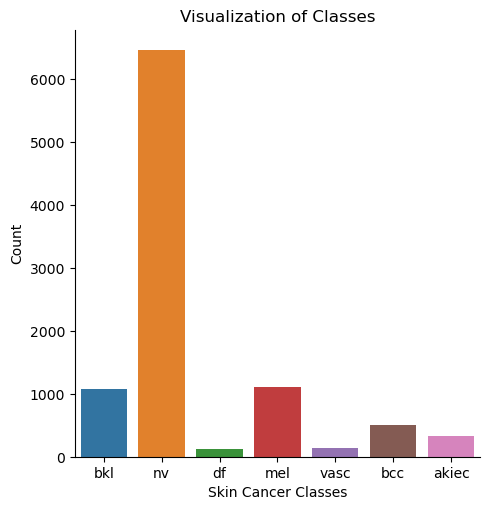

In [265]:
import seaborn as sns
s=sns.catplot(x='dx', kind='count',data=data)  # plot the graph of skin cancer classes versus total no. of occurences of that class 
s.ax.set_title('Visualization of Classes')
s.set_xlabels('Skin Cancer Classes')
s.set_ylabels('Count')

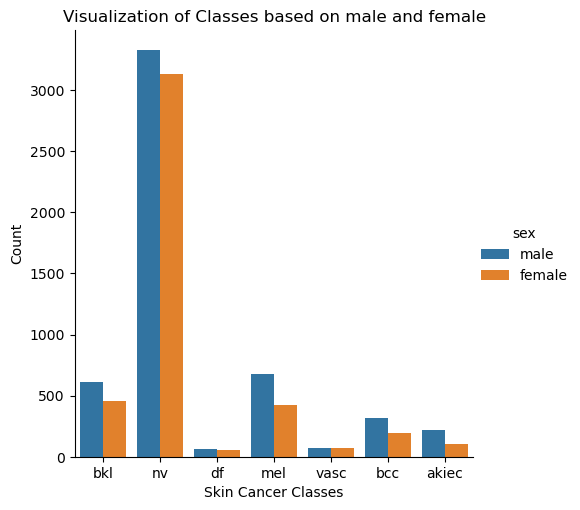

In [266]:
import seaborn as sns
s=sns.catplot(x='dx', kind='count',data=data, hue="sex")   # plot the graph to identify skin lesion classes between males and female
s.ax.set_title('Visualization of Classes based on male and female')
s.set_xlabels('Skin Cancer Classes')
s.set_ylabels('Count')

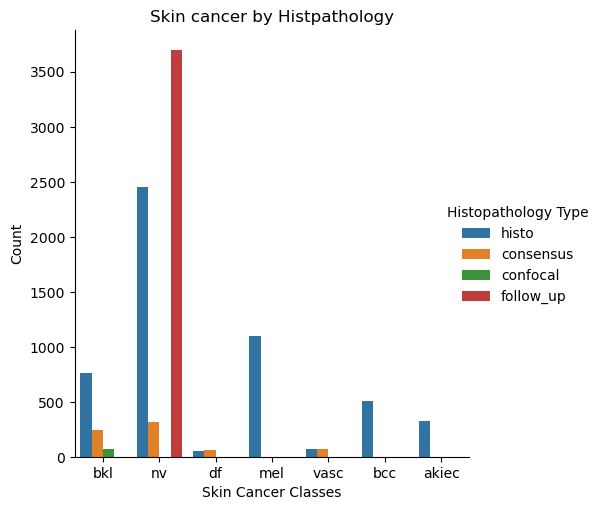

In [267]:
import seaborn as sns
sns=sns.catplot(x='dx', kind='count',data=data, hue="dx_type")   # classes vs count based on histpathology
sns.ax.set_title('Skin cancer by Histpathology')
sns.set_xlabels('Skin Cancer Classes')
sns.set_ylabels('Count')
sns._legend.set_title('Histopathology Type')

nv is obeserved by follow up

In [268]:
import seaborn as sns

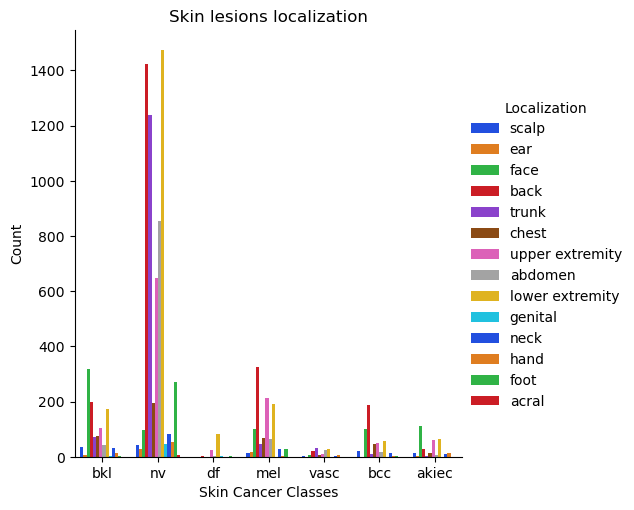

In [269]:
# class vs count based on localization
sns=sns.catplot(x='dx', kind='count',data=data, hue="localization", palette = "bright") 
sns.ax.set_title('Skin lesions localization')

sns.set_xlabels('Skin Cancer Classes')
sns.set_ylabels('Count')
sns._legend.set_title('Localization')

It seems from the above graph that skin lesions are major in the back and lower extremity

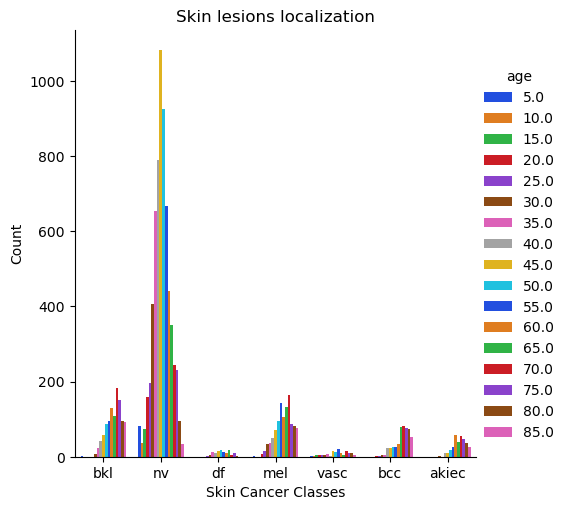

In [270]:
import seaborn as sns

# classes vs count based on age groups
s=sns.catplot(x='dx', kind='count',data=data, hue="age", palette = "bright")
s.ax.set_title('Skin lesions localization')

s.set_xlabels('Skin Cancer Classes')
s.set_ylabels('Count')
s._legend.set_title('age')

It can be obeserved that nv is predominant in people of 45 age group

In [271]:
# import label encoder library for encoding classes
from sklearn.preprocessing import LabelEncoder

In [272]:
# label encoding to values
label=LabelEncoder()
label.fit(data['dx'])
LabelEncoder()
print(list(label.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [273]:
#add new column called label
data['label']=label.transform(data["dx"])
print(data.sample(10))

        lesion_id      image_id   dx    dx_type   age     sex  \
5196  HAM_0006607  ISIC_0026985   nv  follow_up  70.0    male   
2035  HAM_0007188  ISIC_0031543  mel      histo  60.0  female   
7360  HAM_0003993  ISIC_0033706   nv      histo  45.0    male   
347   HAM_0003014  ISIC_0031542  bkl      histo  45.0    male   
828   HAM_0001642  ISIC_0028490  bkl   confocal  65.0    male   
2537  HAM_0007428  ISIC_0031762  bcc      histo  75.0  female   
5197  HAM_0002638  ISIC_0028096   nv  follow_up  70.0    male   
2774  HAM_0004300  ISIC_0025266  bcc      histo  65.0  female   
4020  HAM_0004552  ISIC_0027593   nv  follow_up  70.0  female   
5730  HAM_0007375  ISIC_0027233   nv  follow_up  50.0  female   

         localization        dataset  label  
5196          abdomen  vidir_molemax      5  
2035  upper extremity      rosendahl      4  
7360  upper extremity   vidir_modern      5  
347   upper extremity      rosendahl      2  
828              face   vidir_modern      2  
2537    

### Image Preprocessing

In [275]:
# Import some libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as img
import cv2

In [276]:
# Load images 
# path of training images folder
train_images_path = 'HAM10000_images'

# initialize an empty list to store the images
train_images = []

# using for loop to get the files in the folder
for filename in os.listdir(train_images_path):
    
    # read the image file using OpenCV
    image = cv2.imread(os.path.join(train_images_path, filename))
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # append the image to the list
    train_images.append(img_rgb)

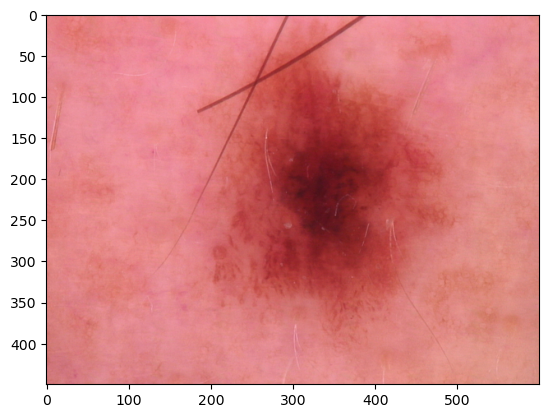

In [277]:
#Show the image
#plt.figure()
plt.imshow(train_images[0])
plt.show()


In [278]:
type(train_images[0])

numpy.ndarray

In [279]:
import tensorflow  as tf
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from skimage.io import imread

In [282]:
# import libraries to read images
from glob import glob
from PIL import Image

In [283]:
# Read images based on image_id from the dataset
img_path = {os.path.splitext(os.path.basename(x))[0]: x
             for x in glob(os.path.join('HAM10000_images/','*.jpg'))}

In [284]:
# Add new column
data['path']=data['image_id'].map(img_path.get)

In [285]:
data.head() # show the path column added

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,2,HAM10000_images\ISIC_0031633.jpg


In [286]:
# define the size
SIZE=64
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,2,HAM10000_images\ISIC_0031633.jpg


In [287]:
# Path to read images
data['image']= data['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))


In [288]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,label,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0027419.jpg,"[[[191, 152, 194], [191, 153, 195], [192, 149,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0025030.jpg,"[[[23, 13, 23], [25, 14, 28], [37, 24, 46], [6..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0026769.jpg,"[[[186, 129, 140], [192, 136, 151], [198, 143,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,2,HAM10000_images\ISIC_0025661.jpg,"[[[24, 11, 19], [36, 20, 30], [64, 38, 50], [9..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,2,HAM10000_images\ISIC_0031633.jpg,"[[[139, 95, 118], [158, 114, 138], [178, 133, ..."


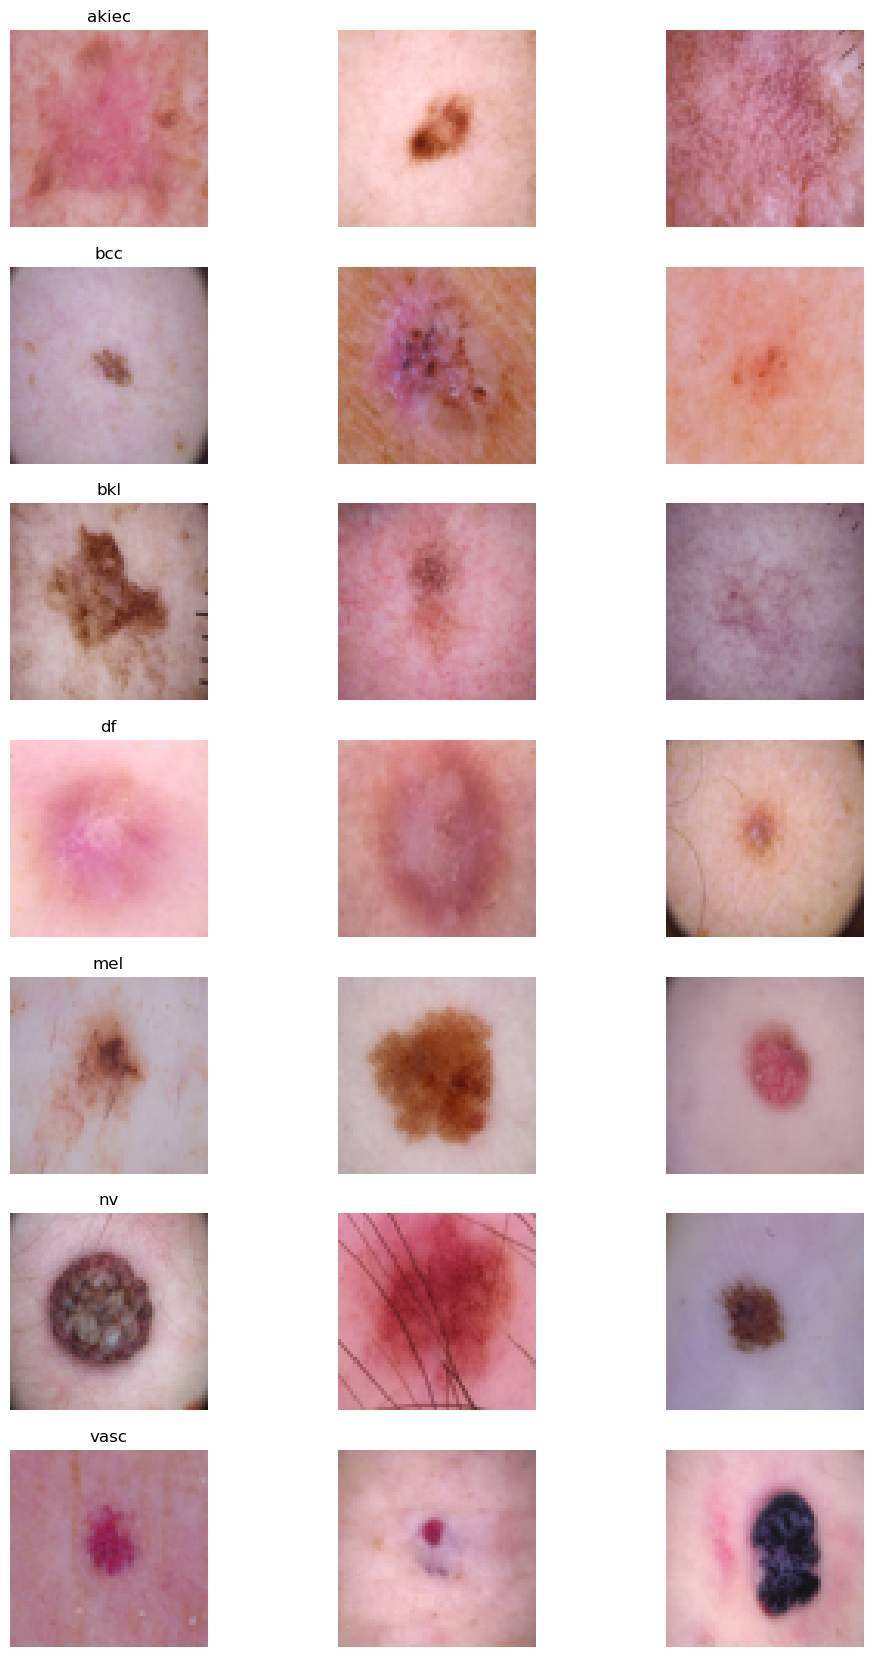

In [289]:
# plot some images belonging to its class

n=3
fig,ax1 = plt.subplots(7,n, figsize = (4*n, 3*7))
for ax2, (type_name, type_rows) in zip(ax1, data.sort_values(['dx']).groupby('dx')):
    ax2[0].set_title(type_name)
    for ax3, (_, c_row) in zip(ax2, type_rows.sample(n, random_state=1234).iterrows()):
        ax3.imshow(c_row['image'])
        ax3.axis('off')

In [367]:
# convert into array
from keras.utils.np_utils import to_categorical
x = np.asarray(data['image'].tolist())
x=x/255    # scale between 0 to 1
y=data['label']  # labels associated to that image id

# convert to categorical values - encode
y=to_categorical(y,num_classes=7)

Here, it can be observed that the data is imbalanced as 'nv' class has the highest number of images while 'df' has the lowest

### Train test split

In [292]:
# splitting of traing and test data
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify=data['dx']) # equal split among the classes

In [150]:
x_train.shape

(6806, 64, 64, 3)

In [151]:
x_test.shape

(2918, 64, 64, 3)

## Build a model

In [157]:
# import libraries to build a model
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization

In [162]:
# CNN
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(64,64,3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 256)       7168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 256)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 31, 31, 256)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 128)       295040    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 128)      

In [163]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [165]:
# train a model
hist = model.fit(x_train, y_train, epochs=20, batch_size=16, validation_data =(x_test, y_test), verbose=1)

Epoch 1/20
426/426 [==============================] - 116s 273ms/step - loss: 0.9638 - acc: 0.6662 - val_loss: 0.9500 - val_acc: 0.6813
Epoch 2/20
426/426 [==============================] - 117s 274ms/step - loss: 0.9394 - acc: 0.6694 - val_loss: 0.9179 - val_acc: 0.6727
Epoch 3/20
426/426 [==============================] - 118s 278ms/step - loss: 0.8858 - acc: 0.6769 - val_loss: 0.9625 - val_acc: 0.6779
Epoch 4/20
426/426 [==============================] - 116s 273ms/step - loss: 0.8478 - acc: 0.6854 - val_loss: 0.8443 - val_acc: 0.6888
Epoch 5/20
426/426 [==============================] - 118s 276ms/step - loss: 0.8117 - acc: 0.6972 - val_loss: 0.8258 - val_acc: 0.6981
Epoch 6/20
426/426 [==============================] - 126s 297ms/step - loss: 0.8030 - acc: 0.7004 - val_loss: 0.8307 - val_acc: 0.7015
Epoch 7/20
426/426 [==============================] - 116s 272ms/step - loss: 0.7744 - acc: 0.7139 - val_loss: 0.7816 - val_acc: 0.7183
Epoch 8/20
426/426 [============================

In [166]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.7313762903213501
Test accuracy: 0.739547610282898


As a result, the test and training accuracy is almost same. i.e., 0.73

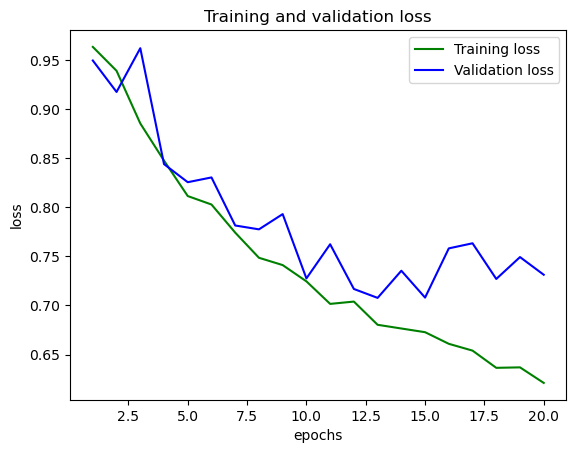

In [167]:
# plot a graph showing training loass and validation loss per each epochs
loss = hist.history['loss']
v_loss = hist.history['v_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, v_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

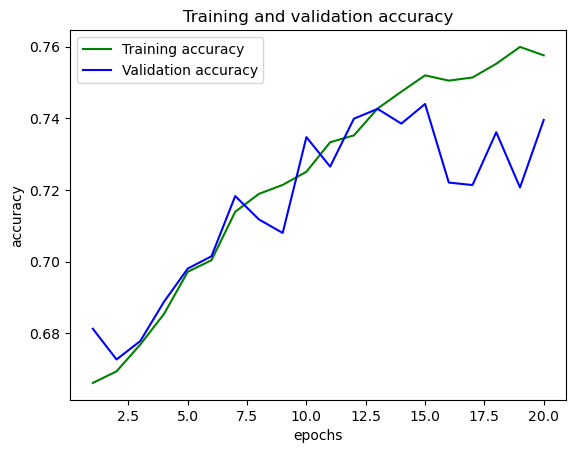

In [168]:
# plot line graph of train and validation accuracy per epochs
acc = hist.history['acc']
v_acc = hist.history['v_acc']
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, v_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Predictions

In [239]:
# Test data prediction
y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred,axis=1) 

ytrue = np.argmax(y_test, axis=1)


In [240]:
from sklearn.metrics import confusion_matrix, classification_report

#y_pred = cnn.predict(x_test)
y_pred_classes= [np.argmax(i) for i in y_pred ]

#classification_report(ytrue, y_pred_classes)
print("Classification Report : \n", classification_report(ytrue, y_pred_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.26      0.38      0.31        98
           1       0.36      0.54      0.43       153
           2       0.44      0.53      0.48       321
           3       0.28      0.29      0.28        35
           4       0.33      0.61      0.43       330
           5       0.93      0.71      0.80      1940
           6       0.60      0.78      0.68        41

    accuracy                           0.65      2918
   macro avg       0.46      0.55      0.49      2918
weighted avg       0.74      0.65      0.68      2918



As seen from the above data, the accuracy doesn't seem to be that good, as the test data is highly imbalance, varying from 35 to 1940. So, check the exact number of occurences of classes in the training data.

## Uneven data distribution

In [291]:
# images distribution per classes
data['dx'].value_counts()

nv       6463
mel      1101
bkl      1071
bcc       509
akiec     327
vasc      138
df        115
Name: dx, dtype: int64

As the data is highly imbalance, I am using one of the popular over sampling techniques, SMOTE, as some of the classes have insufficient values to train.



### Over sampling (SMOTE)

SMOTE, Synthetic Minority Over-sampling Technique, creates synthetic samples by randomly sampling the characteristics from occurrences in the minority class.

In [293]:
x.shape

(9724, 64, 64, 3)

In [294]:
type(x)

numpy.ndarray

In [299]:
# converting 4d to 2d numpy array 
xn = x.reshape(9724,64,-1)
xn.shape

(9724, 64, 192)

In [300]:
xr = xn.reshape(9724,-1)
xr.shape

(9724, 12288)

In [301]:
# Over sampling using SMOTE to handle minority class values
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x, y = smote.fit_resample(xr, y)
print(x.shape)
print(y.shape)

(45241, 12288)
(45241, 7)


In [302]:
# Again reshaping it to train 
xrn = x.reshape(45241,64,64,3)

In [303]:
xrn.shape

(45241, 64, 64, 3)

In [322]:
#xrn

In [310]:
# Split the data for train and test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(xrn,y,test_size=0.3, random_state=42)

## Early Stopping

In [316]:
# Using early stopping to avoid over fitting
from tensorflow.keras.callbacks import EarlyStopping

In [317]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)  # stop training if no improvement in accuracy for 5 epochs

In [318]:
#from tensorflow.keras import regularizers
# CNN
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
#model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPool2D(2,2))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPool2D(2,2))
#model.add(Dropout(0.3))

model.add(Flatten())

#model.add(Dense(32, activity_regularizer=regularizers.L2(0.01)))
model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 62, 62, 256)       7168      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 31, 31, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 29, 29, 128)       295040    
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 12, 12, 64)        73792     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 6, 6, 64)       

In [319]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [321]:
# fit the model with batch size=32
history = model.fit(x_train, y_train, epochs=70, batch_size=32,  validation_data =(x_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/70
990/990 [==============================] - 1402s 1s/step - loss: 1.1162 - acc: 0.5624 - val_loss: 0.9069 - val_acc: 0.6693
Epoch 2/70
990/990 [==============================] - 1308s 1s/step - loss: 0.7591 - acc: 0.7226 - val_loss: 0.6963 - val_acc: 0.7435
Epoch 3/70
990/990 [==============================] - 1643s 2s/step - loss: 0.5988 - acc: 0.7848 - val_loss: 0.5505 - val_acc: 0.8001
Epoch 4/70
990/990 [==============================] - 1174s 1s/step - loss: 0.5159 - acc: 0.8144 - val_loss: 0.4995 - val_acc: 0.8168
Epoch 5/70
990/990 [==============================] - 1181s 1s/step - loss: 0.4571 - acc: 0.8338 - val_loss: 0.4949 - val_acc: 0.8202
Epoch 6/70
990/990 [==============================] - 1238s 1s/step - loss: 0.4161 - acc: 0.8494 - val_loss: 0.4171 - val_acc: 0.8514
Epoch 7/70
990/990 [==============================] - 1256s 1s/step - loss: 0.3815 - acc: 0.8622 - val_loss: 0.3653 - val_acc: 0.8730
Epoch 8/70
990/990 [==============================] - 1273s 1s

In [323]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.33619219064712524
Test accuracy: 0.8897075057029724


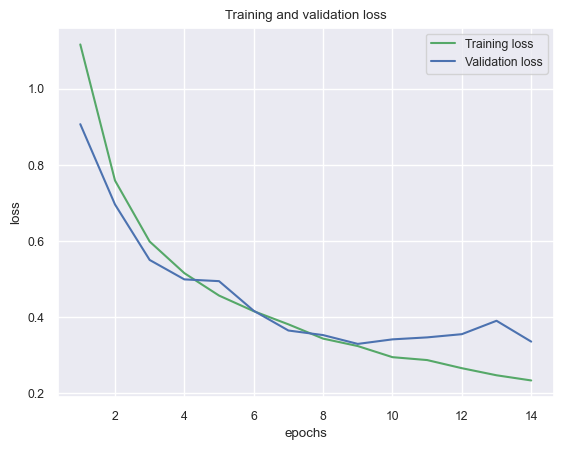

In [331]:
# plot a graph showing training loss and validation loss per each epochs
# Early stopping training and validation loss
loss = history.history['loss']
v_loss = history.history['v_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, v_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

The validation as well as the training loss is minimum here ~0.2-0.4

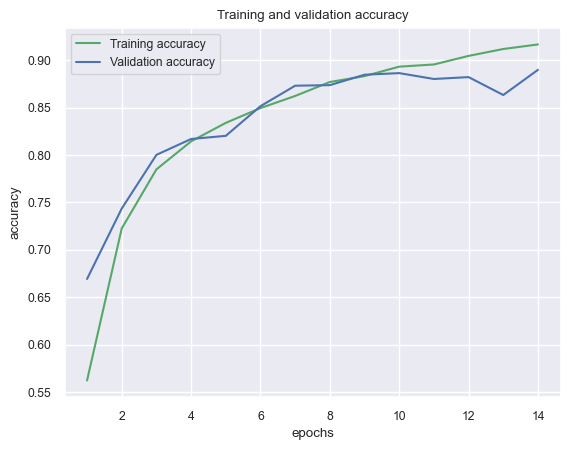

In [333]:
# Early Stopping Train and validation accuracy
# plot line graph of train and validation accuracy per epochs
acc = history.history['acc']
v_acc = history.history['v_acc']
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, v_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

The validation and training accuracy is stabilizing after some point near 0.90

In [363]:
# prediction of test data
y_pred = model.predict(x_test)

# convert prediction class - one hot encoding
y_pred_classes = np.argmax(y_pred,axis=1) 

# convert data of test - one hot encoding
ytrue = np.argmax(y_test, axis=1)


## Results

<AxesSubplot: >

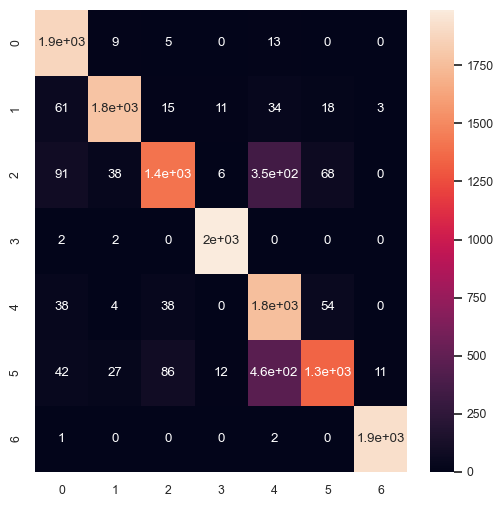

In [385]:
# plot confusion matrix 
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=0.8)
sns.heatmap(c, annot=True,ax=ax)

In [329]:
#y_pred = cnn.predict(x_test)
y_pred_classes1= [np.argmax(i) for i in y_pred ]

#classification_report(ytrue, y_pred_classes)
print("Classification Report : \n", classification_report(ytrue, y_pred_classes1))

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.99      0.93      1902
           1       0.96      0.93      0.94      1927
           2       0.91      0.72      0.80      1949
           3       0.99      1.00      0.99      1993
           4       0.67      0.93      0.78      1894
           5       0.91      0.68      0.78      1981
           6       0.99      1.00      1.00      1927

    accuracy                           0.89     13573
   macro avg       0.90      0.89      0.89     13573
weighted avg       0.90      0.89      0.89     13573



As it can be clearly seen that, the data is almost even and the accuracy is far better than the previous one

Text(0, 0.5, 'Incorrect prediction')

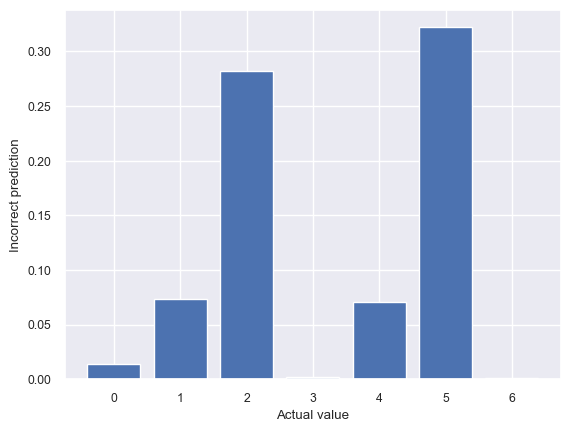

In [330]:
# misclassification
incorrect = 1-np.diag(c) / np.sum(c, axis=1)
plt.bar(np.arange(7), incorrect)
plt.xlabel("Actual value")
plt.ylabel("Incorrect prediction")

In [371]:
# print class names
classes=list(label.classes_)             # row indices
print(classes)
type(classes)

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


list

## Prediction

C:\Users\NIDHI\anaconda3\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


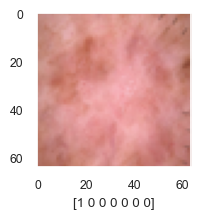

In [376]:
# plot one image with prediction
def plot_img(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(y[index])
    plt.grid(False)
plot_img(x_test, y_test, 2)

As seen, the above image belongs to 'akiec' class